In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import fetch_openml
import random
from sklearn.preprocessing import StandardScaler



## Dataset Load and visualize

In [68]:
mnist = fetch_openml('mnist_784', version=1)

# Features and labels
X = mnist.data        # 784 columns, pixel values (0-255)
y = mnist.target 

In [69]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [70]:
indices = np.random.choice(X.index, size=2000, replace=False)

In [73]:

X=X.iloc[indices]
y=y.iloc[indices]

In [26]:
X.iloc[1,:]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 784, dtype: int64

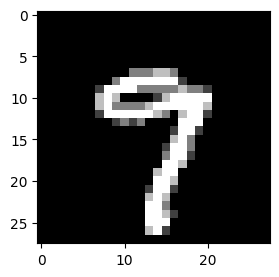

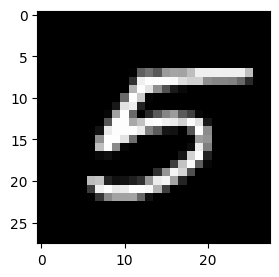

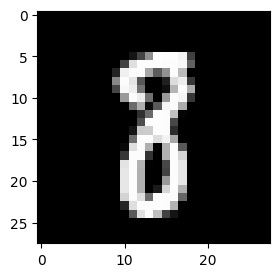

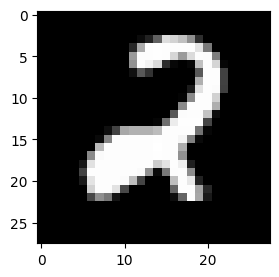

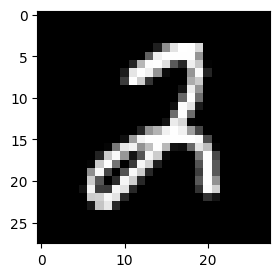

In [74]:
for i in range(5):
    k=random.randint(0,1000)
    plt.figure(figsize=(3,6))
    plt.imshow(X.iloc[k,:].values.reshape(28, 28), cmap='gray')
    plt.show()

In [16]:
#Pca algorithm
#Step1: Center the data.
# Step 2: Find covariance matrix 
# step 3: Find the eigenvalue and eigenvector of the matrices

## PCA implementation

In [41]:
def PCA(X,n_components):
    # centering the data
    mean=np.mean(X,axis=0)
    centered_data=X-mean
    # calculating covariance matrix
    cov_matrix=np.cov(centered_data,rowvar=False)#making columns as a features
    # finding eigenvalues and eigenvecttors 
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    # sorting eigenvalues in descending order
    sorted_indexes=np.argsort(eigen_values)[::-1]
    eigenvalues=eigen_values[sorted_indexes]
    eigenvectors=eigen_vectors[:,sorted_indexes]

    # selecting n_components eigenvectors
    selected_eigenvectors=eigen_vectors[:,:n_components]
    # projecting the data on selected_eigenvectors
    proj_data=np.dot(centered_data, selected_eigenvectors)

    return proj_data, eigenvalues, eigenvectors



In [77]:
transformed_data, eigenvalues, eigenvectors = PCA(X, n_components=2)

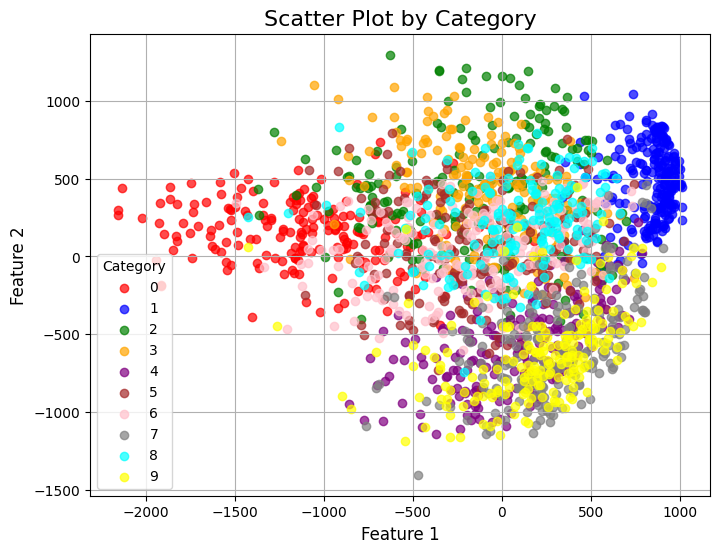

In [81]:
# Unique categories and colors
categories = np.unique(y)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellow']# Colors for each category

# Plot each category
plt.figure(figsize=(8, 6))
for category, color in zip(categories, colors):
    indices = y == category
    plt.scatter(transformed_data[indices, 0],transformed_data[indices, 1], label=category, color=color, alpha=0.7)

plt.title("Scatter Plot by Category", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Category", fontsize=10)
plt.grid(True)
plt.show()

In [85]:
# using pca the 784 dimension features are dropped to 2 dimensions